Epoch 1/10


1563/1563 [==============================] - 8s 4ms/step - loss: 1.8877 - accuracy: 0.3233 - val_loss: 1.7823 - val_accuracy: 0.3640
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7211 - accuracy: 0.3910 - val_loss: 1.7334 - val_accuracy: 0.3832
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6482 - accuracy: 0.4218 - val_loss: 1.6128 - val_accuracy: 0.4323
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.4392 - val_loss: 1.5848 - val_accuracy: 0.4399
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5571 - accuracy: 0.4507 - val_loss: 1.9044 - val_accuracy: 0.3213
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5260 - accuracy: 0.4638 - val_loss: 1.5435 - val_accuracy: 0.4532
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4990 - accuracy: 0.4728 - val_loss: 1.5268 - val_accurac

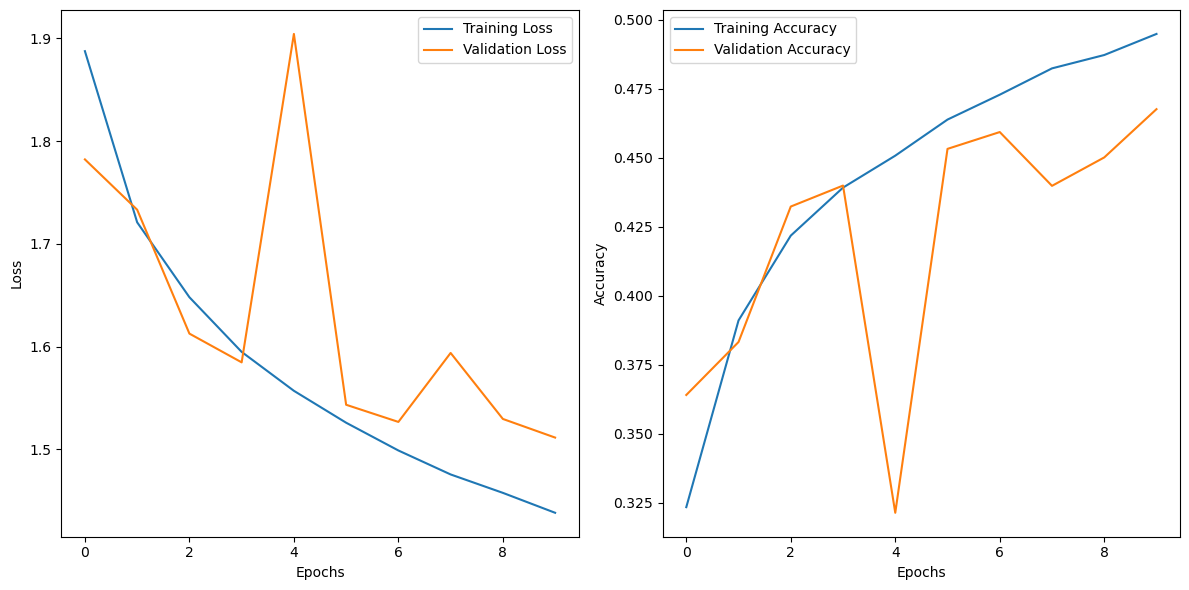

313/313 [==============================] - 0s 1ms/step


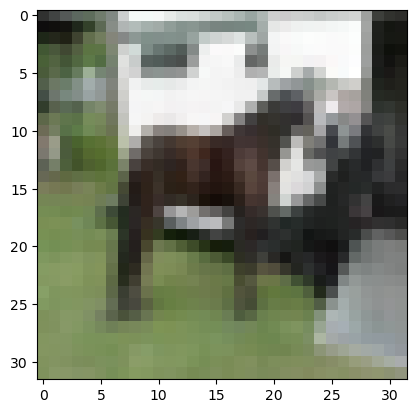

Predicted label: Deer


In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load training and test data from CSV files
train_df = pd.read_csv('train_data.csv')  # Update with the actual path
test_df = pd.read_csv('test_data.csv')    # Update with the actual path

# Separate features and labels
x_train = train_df.iloc[:, :-1].values  # Image data (flattened pixels)
y_train = train_df.iloc[:, -1].values    # Labels are in the last column

x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to (32, 32, 3) for model compatibility
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"This is Test_loss: {test_loss}, This is Test_acc: {test_acc}")

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make a prediction and visualize it
pre_val = model.predict(x_test)

# Display the image and the predicted label
plt.imshow(x_test[20])  # Change the index to visualize a different image
plt.show()

print("Predicted label:", class_names[np.argmax(pre_val[20], axis=0)])  # Prediction for the image


In [ ]:
'''import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load training and test data from CSV files
train_df = pd.read_csv('train_data.csv')  # Update with the actual path
test_df = pd.read_csv('test_data.csv')    # Update with the actual path

# Separate features and labels
x_train = train_df.iloc[:, :-1].values  # Image data (flattened pixels)
y_train = train_df.iloc[:, -1].values   # Labels are in the last column

x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to (32, 32, 3) for model compatibility
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with more layers and Dropout for regularization
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),            # Flatten the input
    Dense(512, activation='relu'),               # Hidden layer with 512 neurons
    Dropout(0.5),                                # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),               # Hidden layer with 256 neurons
    Dropout(0.5),                                # Dropout layer
    Dense(128, activation='relu'),               # Hidden layer with 128 neurons
    Dense(10, activation='softmax')              # Output layer for 10 classes
])

# Compile the model with Adam optimizer for better performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"This is Test_loss: {test_loss}, This is Test_acc: {test_acc}")

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make a prediction and visualize it
pre_val = model.predict(x_test)

# Display the image and the predicted label
plt.imshow(x_test[20])  # Change the index to visualize a different image
plt.show()

print("Predicted label:", class_names[np.argmax(pre_val[20], axis=0)])  # Prediction for the image
'''